**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [3]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [10]:
# Define parameters
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * 16**2)
w = 1.0
tau = 0.3

# Define utility and constraint functions
def utility(L, G, tau, alpha, kappa, w, nu):
    tilde_w = (1 - tau) * w
    C = kappa + tilde_w * L
    return np.log(C**alpha * G**(1 - alpha)) - nu * L**2 / 2

def constraint(L, tau, w):
    tilde_w = (1 - tau) * w
    return kappa + tilde_w * L

# Define the optimal labor supply function
def L_star(tilde_w, alpha, kappa, nu):
    return (-kappa + np.sqrt(kappa**2 + 4 * alpha / nu * tilde_w**2)) / (2 * tilde_w)

# Calculate the optimal labor supply for each G
for G in [1.0, 2.0]:
    tilde_w = (1 - tau) * w
    L = L_star(tilde_w, alpha, kappa, nu)
    C = constraint(L, tau, w)
    V = utility(L, G, tau, alpha, kappa, w, nu)
    print(f"For G = {G}, optimal labor supply L* = {L}, consumption C = {C}, utility V = {V}")

For G = 1.0, optimal labor supply L* = 15.30165022719559, consumption C = 11.711155159036913, utility V = 1.0016180782717354
For G = 2.0, optimal labor supply L* = 15.30165022719559, consumption C = 11.711155159036913, utility V = 1.3481916685517081


**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

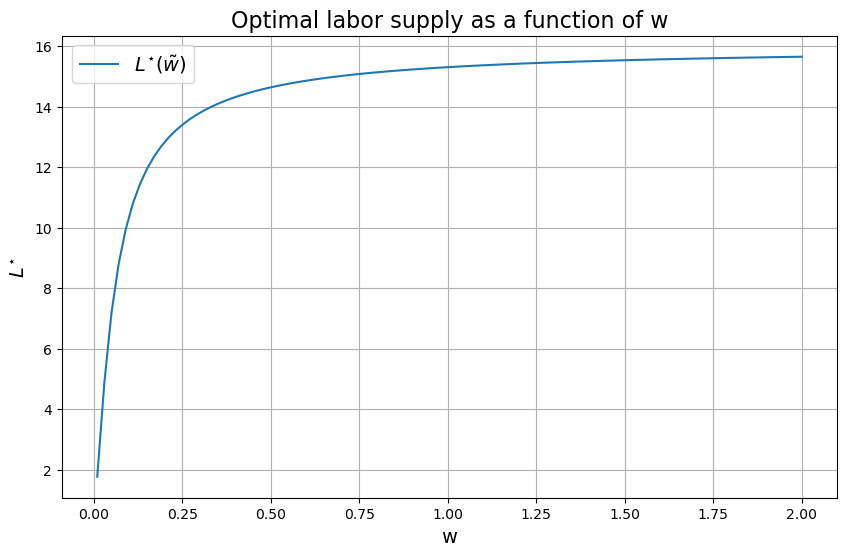

In [11]:
# Set up a range of w values
w_values = np.linspace(0.01, 2, 100)  # We start from 0.01 to avoid division by zero in L_star

# Calculate corresponding L_star values
L_star_values = [L_star((1 - tau) * w, alpha, kappa, nu) for w in w_values]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(w_values, L_star_values, label='$L^{\star}(\\tilde{w})$')
plt.xlabel('w', fontsize=14)
plt.ylabel('$L^{\star}$', fontsize=14)
plt.title('Optimal labor supply as a function of w', fontsize=16)
plt.legend(fontsize=14)
plt.grid(True)
plt.show()


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


/var/folders/pz/kctcbrz913q45c9l_2mncn_r0000gp/T/ipykernel_40130/2548386821.py:15: RuntimeWarning: divide by zero encountered in log
  utility = np.log((kappa + (1.0 - tau) * w * L_star) ** alpha * G ** (1.0 - alpha)) - nu * L_star ** 2 / 2.0
/var/folders/pz/kctcbrz913q45c9l_2mncn_r0000gp/T/ipykernel_40130/2548386821.py:13: RuntimeWarning: invalid value encountered in double_scalars
  L_star = (-kappa + np.sqrt(kappa ** 2 + 4.0 * alpha / nu * w_tilde ** 2)) / (2.0 * w_tilde)


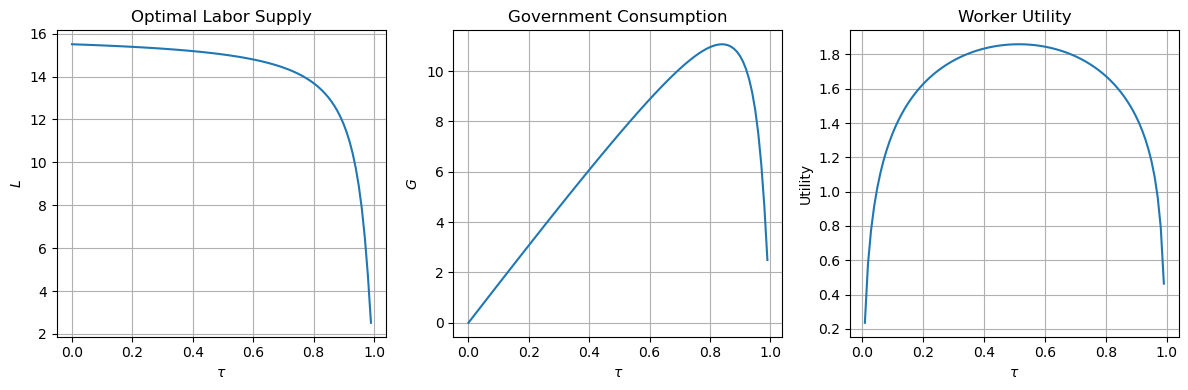

In [12]:
alpha = 0.5
kappa = 1.0
nu = 1.0 / (2.0 * 16.0 ** 2)
w = 1.0

tau_values = np.linspace(0.0, 1.0, 100)
L_values = []
G_values = []
utility_values = []

for tau in tau_values:
    w_tilde = (1.0 - tau) * w
    L_star = (-kappa + np.sqrt(kappa ** 2 + 4.0 * alpha / nu * w_tilde ** 2)) / (2.0 * w_tilde)
    G = tau * w * L_star
    utility = np.log((kappa + (1.0 - tau) * w * L_star) ** alpha * G ** (1.0 - alpha)) - nu * L_star ** 2 / 2.0
    L_values.append(L_star)
    G_values.append(G)
    utility_values.append(utility)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(tau_values, L_values)
plt.xlabel('$\\tau$')
plt.ylabel('$L$')
plt.title('Optimal Labor Supply')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(tau_values, G_values)
plt.xlabel('$\\tau$')
plt.ylabel('$G$')
plt.title('Government Consumption')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(tau_values, utility_values)
plt.xlabel('$\\tau$')
plt.ylabel('Utility')
plt.title('Worker Utility')
plt.grid(True)

plt.tight_layout()
plt.show()

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

Optimal tax rate:  0.5151515151515152


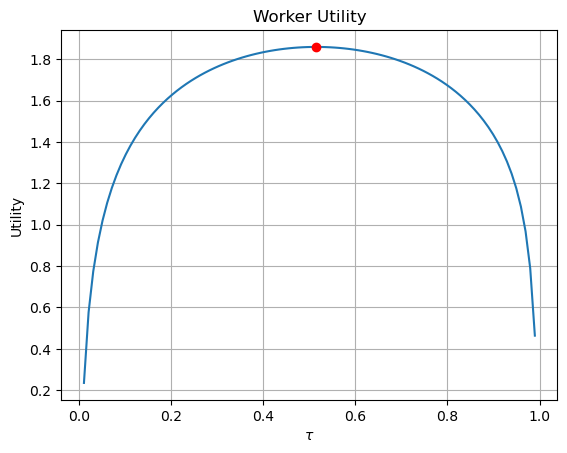

In [13]:
def find_max(utility_values):
    max_utility = max(utility_values)
    max_index = utility_values.index(max_utility)
    return max_index, max_utility

print("Optimal tax rate: ", tau_values[find_max(utility_values)[0]])

plt.subplot(1, 1, 1)
plt.plot(tau_values, utility_values)
plt.plot(tau_values[find_max(utility_values)[0]], find_max(utility_values)[1], 'ro')
plt.xlabel('$\\tau$')
plt.ylabel('Utility')
plt.title('Worker Utility')
plt.grid(True)

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [14]:
# Define the parameters
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * 16**2)
w = 1.0
tau = 0.51

params_set_1 = {"sigma": 1.001, "rho": 1.001, "epsilon": 1.0,}

params_set_2 = {"sigma": 1.5, "rho": 1.5, "epsilon": 1.0,}

# Utility function wich is negative since we are maximizing
def utility(L, G, tau, alpha, kappa, w, nu, sigma, rho, epsilon):
    C = kappa + (1 - tau) * w * L
    Bracket = (alpha * C**((sigma - 1) / sigma) + (1 - alpha) * G**((sigma - 1) / sigma))**(sigma / (sigma - 1))
    return -((Bracket**(1 - rho) - 1) / (1 - rho) - nu * L**(1 + epsilon) / (1 + epsilon))

# Function to find the optimal labor for given G and tau with a start ques of 12
def solve_worker(G, tau, sigma, rho, epsilon):
    result = minimize(utility, [12], args=(G, tau, alpha, kappa, w, nu, sigma, rho, epsilon), bounds=[(0, 24)])
    return result.x[0]

# Function to find G that solves the government problem
def solve_government(tau, sigma, rho, epsilon):
    G = 0.5  # initial guess
    for _ in range(100):  # maximum of 100 iterations
        L_star = solve_worker(G, tau, sigma, rho, epsilon)
        new_G = tau * w * L_star
        if abs(new_G - G) < 1e-6:  # break if converged
            break
        G = new_G
    return G

# Use these functions to solve the government problem for both sets of parameters
G_set_1 = solve_government(tau, params_set_1["sigma"], params_set_1["rho"], params_set_1["epsilon"])
G_set_2 = solve_government(tau, params_set_2["sigma"], params_set_2["rho"], params_set_2["epsilon"])

print(f"Government consumption G for parameter set 1: {G_set_1}")
print(f"Government consumption G for parameter set 2: {G_set_2}")

Government consumption G for parameter set 1: 7.649334347881264
Government consumption G for parameter set 2: 4.941096442109014


**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [15]:
# Define parameters
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * 16**2)
w = 1.0

params_set_1 = {"sigma": 1.001, "rho": 1.001, "epsilon": 1.0}
params_set_2 = {"sigma": 1.5, "rho": 1.5, "epsilon": 1.0}

# Define a new utility function that takes tau as an argument and internally solves for L and G
def utility_tau(tau, alpha, kappa, w, nu, sigma, rho, epsilon):
    G = solve_government(tau, sigma, rho, epsilon)
    L = solve_worker(G, tau, sigma, rho, epsilon)
    C = kappa + (1 - tau) * w * L
    term = (alpha * C**((sigma - 1) / sigma) + (1 - alpha) * G**((sigma - 1) / sigma))**(sigma / (sigma - 1))
    return -((term**(1 - rho) - 1) / (1 - rho) - nu * L**(1 + epsilon) / (1 + epsilon))

# Find the optimal tax rate for both sets of parameters with 0.5 as initial guess
tau_star_set_1 = minimize(utility_tau, [0.5], args=(alpha, kappa, w, nu, params_set_1['sigma'], params_set_1['rho'], params_set_1['epsilon']), bounds=[(0, 1)])
tau_star_set_2 = minimize(utility_tau, [0.5], args=(alpha, kappa, w, nu, params_set_2['sigma'], params_set_2['rho'], params_set_2['epsilon']), bounds=[(0, 1)])

print(f"Socially optimal tax rate for parameter set 1: {tau_star_set_1.x[0]}")
print(f"Socially optimal tax rate for parameter set 2: {tau_star_set_2.x[0]}")

Socially optimal tax rate for parameter set 1: 0.5000056579623965
Socially optimal tax rate for parameter set 2: 0.4584653779131453


## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [16]:
# we define the parameters
eta = 0.5
w = 1.0
kappa_values = [1.0, 2.0]

# we define the function to calculate the profit
def calculate_profit(kappa, ell, w, eta):
    return kappa * ell**(1 - eta) - w * ell

# we calculate the optimal labor supply and the maximum profit for each kappa
for kappa in kappa_values:
    optimal_ell = ((1 - eta) * kappa / w) ** (1 / eta)
    max_profit = calculate_profit(kappa, optimal_ell, w, eta)

    print(f"For kappa = {kappa}: Optimal hairdressers = {optimal_ell}, Max profit = {max_profit}")

For kappa = 1.0: Optimal hairdressers = 0.25, Max profit = 0.25
For kappa = 2.0: Optimal hairdressers = 1.0, Max profit = 1.0


We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [18]:
# Define the parameters
eta = 0.5
w = 1.0
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1 + 0.01)**(1/12)
T = 120
K = 10000  # Number of random shock series

# Define the policy function
def policy(kappa):
    return ((1 - eta) * kappa / w)**(1 / eta)

# Define the profit function
def profit(kappa, ell, ell_prev):
    return kappa * ell**(1 - eta) - w * ell - (ell != ell_prev) * iota

# Creating an array to store the ex values
h_values = np.zeros(K)

# Generate K random shock series and calculate the ex post value for each
np.random.seed(100)  # Set a random seed for reproducibility
for k in range(K): # For each shock series
    epsilon = np.random.normal(-0.5 * sigma_epsilon**2, sigma_epsilon, T)
    kappa = np.exp(rho * np.log(1) + epsilon) # we are taking the exponential since kappa is log transformed in the description
    ell_prev = 0  
    for t in range(T): # For each period
        ell = policy(kappa[t])
        h_values[k] += R**(-t) * profit(kappa[t], ell, ell_prev) # from the description we know that the discount factor is R^(-t)
        ell_prev = ell

# Calculate the expected value
H = h_values.mean()

print(f"The expected value of the salon is {H:.2f}")

The expected value of the salon is 27.71


Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [19]:
# exact same code as above, we just added an "if/else" statement to the policy function 

# New policy function
def policy(kappa, ell_prev, Delta):
    ell_star = ((1 - eta) * kappa / w) ** (1 / eta)
    if abs(ell_prev - ell_star) > Delta:
        return ell_star
    else:
        return ell_prev

# Define the profit function
def profit(kappa, ell, ell_prev):
    return kappa * ell**(1 - eta) - w * ell - (ell != ell_prev) * iota

# Creating an array to store the ex values
h_values_new = np.zeros(K)

# Generate K random shock series and calculate the ex post value for each
np.random.seed(100)  # Set a random seed for reproducibility
Delta = 0.05  # Adjustment threshold
for k in range(K): # For each shock series
    epsilon = np.random.normal(-0.5 * sigma_epsilon**2, sigma_epsilon, T)
    kappa = np.exp(rho * np.log(1) + epsilon)  # Assume kappa_{-1} = 1
    ell_prev = 0  # Assume ell_{-1} = 0
    for t in range(T): # For each period
        ell = policy(kappa[t], ell_prev, Delta)
        h_values_new[k] += R**(-t) * profit(kappa[t], ell, ell_prev)
        ell_prev = ell

# Calculate the ex ante expected value for the new policy
H_new = np.mean(h_values_new)

print(f"Old expected value: {H}")
print(f"New expected value: {H_new}")

Old expected value: 27.707879468503503
New expected value: 28.257162127953645


**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [11]:
# write your code here


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In [20]:
# We Change the discount rate for future profits to 0.99
R1 = (1 + 0.001)**(1/12)

# New policy function
def policy(kappa, ell_prev, Delta):
    ell_star = ((1 - eta) * kappa / w) ** (1 / eta)
    if abs(ell_prev - ell_star) > Delta:
        return ell_star
    else:
        return ell_prev

# Define the profit function
def profit(kappa, ell, ell_prev):
    return kappa * ell**(1 - eta) - w * ell - (ell != ell_prev) * iota

# Creating an array to store the ex values
h_values_new = np.zeros(K)

# Generate K random shock series and calculate the ex post value for each
np.random.seed(100)  # Set a random seed for reproducibility
Delta = 0.05  # Adjustment threshold
for k in range(K): # For each shock series
    epsilon = np.random.normal(-0.5 * sigma_epsilon**2, sigma_epsilon, T)
    kappa = np.exp(rho * np.log(1) + epsilon)  # Assume kappa_{-1} = 1
    ell_prev = 0  # Assume ell_{-1} = 0
    for t in range(T): # For each period
        ell = policy(kappa[t], ell_prev, Delta)
        h_values_new[k] += R1**(-t) * profit(kappa[t], ell, ell_prev)
        ell_prev = ell

# Calculate the ex ante expected value for the new policy
H_new = np.mean(h_values_new)

print(f"Old expected value: {H}")
print(f"New expected value: {H_new}")

Old expected value: 27.707879468503503
New expected value: 29.527780588643758


## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [1]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

x*=(x1*,x2*)=(-5.61e-08, -3.43e-08)
Last period = 768


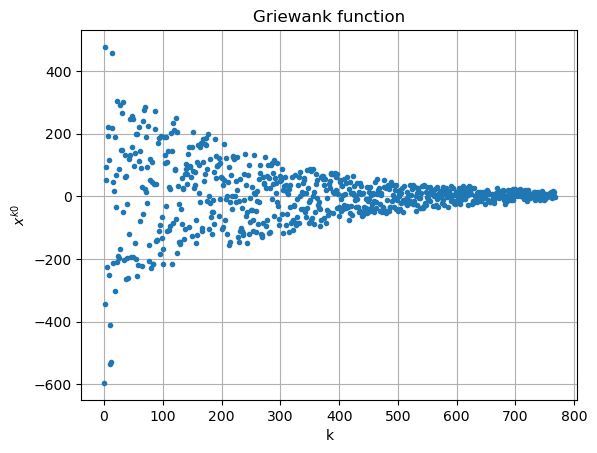

In [8]:
def griewank_solve(K_bar):
    min_ = -600
    max_ = 600
    tolerance = 10e-08
    K = 1000
    xstar = np.array([np.random.uniform(min_,max_),np.random.uniform(min_,max_)])

    xk0_values = np.zeros((0,2))

    for k in range(K):
        if griewank(xstar) > tolerance:
            xk = np.array([np.random.uniform(min_,max_),np.random.uniform(min_,max_)])
            xk0 = xk
            if k >= K_bar:
                Chi = 1/(1+np.exp((k-K_bar)/100))
                xk0 = Chi*xk+(1-Chi)*xstar
            xk0_values = np.append(xk0_values, xk0, axis=None)
            xkstar_ = minimize(griewank, xk0, method='BFGS', tol=tolerance)
            xkstar = xkstar_.x
            if k == 0 or griewank(xkstar) < griewank(xstar):
                xstar = xkstar

    print(f'x*=(x1*,x2*)=({round(xstar[0],10)}, {round(xstar[1],10)})')
    return xk0_values

xk0_values = griewank_solve(10)

plt.plot(xk0_values, marker='.', linestyle='None')
plt.xlabel('k')
plt.ylabel('$x^{k0}$')
plt.title('Griewank function')
plt.grid(True)

print(f'Last period = {len(xk0_values)}')

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

x*=(x1*,x2*)=(-5.3e-08, -4.71e-08)
Last period = 632


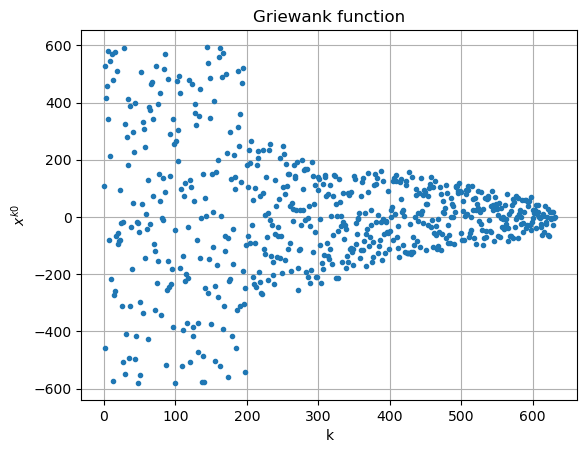

In [9]:
xk0_values = griewank_solve(100)

plt.plot(xk0_values, marker='.', linestyle='None')
plt.xlabel('k')
plt.ylabel('$x^{k0}$')
plt.title('Griewank function')
plt.grid(True)

print(f'Last period = {len(xk0_values)}')